#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [46]:
#write your solution here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [47]:
df=pd.read_csv("imdb_top_10000.txt", sep ='\t')
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [48]:
df = pd.read_csv("imdb_top_10000.txt",sep='\t',names=['title','year','score','votes','runtime','genres'])
df


title  year  score   votes    runtime  \
tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   
...                                    ...   ...    ...     ...        ...   
tt0807721                   Meduzot (2007)  2007    7.0    1357   78 mins.   
tt0339642            Daltry Calhoun (2005)  2005    5.2    1357  100 mins.   
tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356  104 mins.   
tt0152836                      Taal (1999)  1999    6.5    1356  179 mins.   
tt0279977            The Navigators (2001)  2001    6.9    1356   96 mins.   

                                     genres  
tt0111161                       Crime|Drama  
tt0110912                    Crime|Thriller  
tt0137523            Drama|Mystery|Thriller  
tt0133093           Action|Adventure|Sci-Fi  
tt1375666  Action|Adventure|Sci-Fi|Thriller  
...                                     ...  
tt0807721                             Drama  
tt0339642        Comedy|Drama|Music|Romance  
tt0060880            Drama|Mystery|Thriller  
tt0152836                   Musical|Romance  
tt0279977                      Comedy|Drama  

[10000 rows x 6 columns]

In [49]:
df.dtypes

title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [50]:
#checking the null value
df.isna().sum()

title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

### Droping the Null from genres

In [51]:
df.dropna(subset=["genres"],inplace=True)
df.shape

(9999, 6)

In [52]:
#NaN values in every row,
df.isnull().sum(axis = 1)


tt0111161    0
tt0110912    0
tt0137523    0
tt0133093    0
tt1375666    0
            ..
tt0807721    0
tt0339642    0
tt0060880    0
tt0152836    0
tt0279977    0
Length: 9999, dtype: int64

In [53]:
df.dtypes

title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

#Which movies is highest scores in which year? To determine this, you need a title column, a score column, and a year column.

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [54]:
runtime =[int(runtime.split(" ")[0]) for runtime in df.runtime]
df["runtime"]= runtime
df.head()

title  year  score   votes  runtime  \
tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
tt0137523                Fight Club (1999)  1999    8.8  458173      139   
tt0133093                The Matrix (1999)  1999    8.7  448114      136   
tt1375666                 Inception (2010)  2010    8.9  385149      148   

                                     genres  
tt0111161                       Crime|Drama  
tt0110912                    Crime|Thriller  
tt0137523            Drama|Mystery|Thriller  
tt0133093           Action|Adventure|Sci-Fi  
tt1375666  Action|Adventure|Sci-Fi|Thriller

In [55]:
df.dtypes

title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [56]:
genre_set = set()
for genre in df.genres:
    genre_set.update(genre.split('|'))

In [57]:
len(genre_set)

24

In [58]:
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()  

title  year  score   votes  runtime  \
tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
tt0137523                Fight Club (1999)  1999    8.8  458173      139   
tt0133093                The Matrix (1999)  1999    8.7  448114      136   
tt1375666                 Inception (2010)  2010    8.9  385149      148   

                                     genres  Family  Reality-TV  Fantasy  \
tt0111161                       Crime|Drama   False       False    False   
tt0110912                    Crime|Thriller   False       False    False   
tt0137523            Drama|Mystery|Thriller   False       False    False   
tt0133093           Action|Adventure|Sci-Fi   False       False    False   
tt1375666  Action|Adventure|Sci-Fi|Thriller   False       False    False   

           Adventure  ...  Film-Noir  Musical   News  Crime  Adult  Comedy  \
tt0111161      False  ...      False    False  False   True  False   False   
tt0110912      False  ...      False    False  False   True  False   False   
tt0137523      False  ...      False    False  False  False  False   False   
tt0133093       True  ...      False    False  False  False  False   False   
tt1375666       True  ...      False    False  False  False  False   False   

           Horror  Animation  Western  Biography  
tt0111161   False      False    False      False  
tt0110912   False      False    False      False  
tt0137523   False      False    False      False  
tt0133093   False      False    False      False  
tt1375666   False      False    False      False  

[5 rows x 30 columns]

In [59]:
df['title'] = [t[0:-7] for t in df.title]
df.head()

title  year  score   votes  runtime  \
tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
tt0110912              Pulp Fiction  1994    9.0  490065      154   
tt0137523                Fight Club  1999    8.8  458173      139   
tt0133093                The Matrix  1999    8.7  448114      136   
tt1375666                 Inception  2010    8.9  385149      148   

                                     genres  Family  Reality-TV  Fantasy  \
tt0111161                       Crime|Drama   False       False    False   
tt0110912                    Crime|Thriller   False       False    False   
tt0137523            Drama|Mystery|Thriller   False       False    False   
tt0133093           Action|Adventure|Sci-Fi   False       False    False   
tt1375666  Action|Adventure|Sci-Fi|Thriller   False       False    False   

           Adventure  ...  Film-Noir  Musical   News  Crime  Adult  Comedy  \
tt0111161      False  ...      False    False  False   True  False   False   
tt0110912      False  ...      False    False  False   True  False   False   
tt0137523      False  ...      False    False  False  False  False   False   
tt0133093       True  ...      False    False  False  False  False   False   
tt1375666       True  ...      False    False  False  False  False   False   

           Horror  Animation  Western  Biography  
tt0111161   False      False    False      False  
tt0110912   False      False    False      False  
tt0137523   False      False    False      False  
tt0133093   False      False    False      False  
tt1375666   False      False    False      False  

[5 rows x 30 columns]

## 4. EDA

In [60]:
newdf = df[['title','score','votes']]
newdf

title  score   votes
tt0111161  The Shawshank Redemption    9.2  619479
tt0110912              Pulp Fiction    9.0  490065
tt0137523                Fight Club    8.8  458173
tt0133093                The Matrix    8.7  448114
tt1375666                 Inception    8.9  385149
...                             ...    ...     ...
tt0807721                   Meduzot    7.0    1357
tt0339642            Daltry Calhoun    5.2    1357
tt0060880    The Quiller Memorandum    6.5    1356
tt0152836                      Taal    6.5    1356
tt0279977            The Navigators    6.9    1356

[9999 rows x 3 columns]

In [61]:
minscore=newdf['score'].min()
print("The minimum score is", minscore)
maxscore = newdf['score'].max()
print("The maximum score is", maxscore)


The minimum score is 1.5
The maximum score is 9.2


In [62]:
yeardf = df.groupby("year")
df1999 = yeardf.get_group(1999)

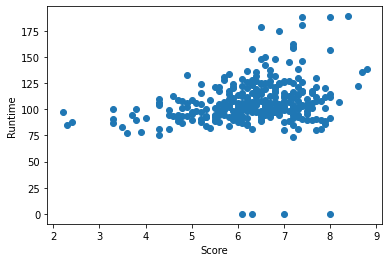

In [63]:
x = df1999.score
y = df1999.runtime

plt.scatter(x,y)
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.show()

In [64]:
year99 = yeardf[['score','runtime']].mean()[:10]

<function matplotlib.pyplot.show(close=None, block=None)>

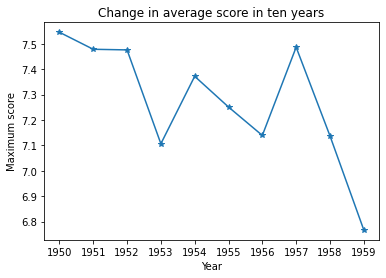

In [76]:
plt.plot(year99.index,year99.score,marker='*')
plt.xticks(year99.index)
plt.title('Change in average score in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum score")
plt.show

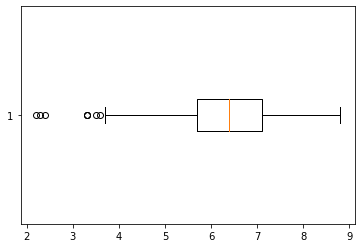

In [66]:
plt.boxplot(df1999.score,vert=False)
plt.show()

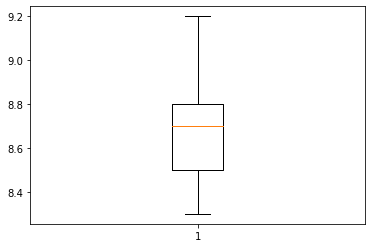

In [67]:
year20 = yeardf[['score','runtime']].max()[-20:]
plt.boxplot(year20.score)
plt.show()

## 5. Determining Best Movies

In [68]:
df1= df.groupby("year")
df1

In [69]:
len(df1)



62

In [70]:
year_check = df.groupby("year", sort=False)
year_check

In [71]:
# finding for minimum score from the dataframe
for key, valuedf in year_check:
    highest_score = valuedf[valuedf['score'] == valuedf.score.max()]
    print(highest_score.title,highest_score.year,highest_score.score)
    break

tt0111161    The Shawshank Redemption
Name: title, dtype: object tt0111161    1994
Name: year, dtype: int64 tt0111161    9.2
Name: score, dtype: float64


Ans The Shawshank Redemption(1994) is a highest score that is 9.2 in the year of 1994

## 6. Trends in Popularity of Genres

In [72]:
genredf = df[list(genre_set)]
genredf.head()

Family  Reality-TV  Fantasy  Adventure  Action  Sci-Fi  Music  \
tt0111161   False       False    False      False   False   False  False   
tt0110912   False       False    False      False   False   False  False   
tt0137523   False       False    False      False   False   False  False   
tt0133093   False       False    False       True    True    True  False   
tt1375666   False       False    False       True    True    True  False   

             War  Romance  Mystery  ...  Film-Noir  Musical   News  Crime  \
tt0111161  False    False    False  ...      False    False  False   True   
tt0110912  False    False    False  ...      False    False  False   True   
tt0137523  False    False     True  ...      False    False  False  False   
tt0133093  False    False    False  ...      False    False  False  False   
tt1375666  False    False    False  ...      False    False  False  False   

           Adult  Comedy  Horror  Animation  Western  Biography  
tt0111161  False   False   False      False    False      False  
tt0110912  False   False   False      False    False      False  
tt0137523  False   False   False      False    False      False  
tt0133093  False   False   False      False    False      False  
tt1375666  False   False   False      False    False      False  

[5 rows x 24 columns]

In [73]:
genredf.sum()

Family         754
Reality-TV       1
Fantasy        916
Adventure     1313
Action        1891
Sci-Fi         897
Music          371
War            512
Romance       2441
Mystery       1009
History        358
Thriller      2832
Drama         5697
Sport          288
Film-Noir       40
Musical        260
News             1
Crime         1867
Adult            9
Comedy        3922
Horror        1215
Animation      314
Western        235
Biography      394
dtype: int64

In [74]:
genre_result =genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

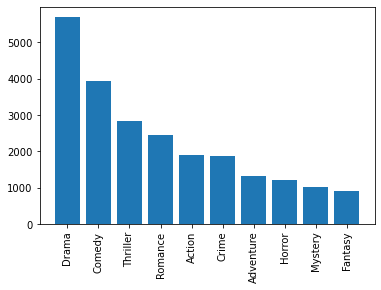

In [75]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

From the 25 genres Drama is the most pupolarity